# Understanding Graph Basics

*Graphs* are structures that present a number of nodes (or vertexes) connected by a number of edges or arcs (depending on the representation). When you think about a graph, think about a structure like a map, where each location on the map is a node and the streets are the edges. 

You can represent graphs in all sorts of ways, most of them abstract, so you need to know how to draw a graph so you can actually see it. The act of turning the numbers that represent a graph into a graphic visualization is called *plotting*. Languages like Python excel at plotting because it's such an important feature. Seeing a graph enables you to perform tasks like computing centrality with greater ease.

The numeric presentation of a graph is important, even if it makes understanding the graph hard. With the need to present a graph in a form that the computer can understand in mind, this chapter discusses three techniques for putting a graph into numeric format: matrices, sparse representation and lists.

## Explaining the Importance of Networks 

A *network* is a kind of graph that associates names with the vertexes (nodes or points), edges (arcs or lines), or both. Associating names with the graph features reduces the level of abstraction and makes understanding the graph easier. The data that the graph models becomes real in the mind of the person viewing it, even though the graph truly is an abstraction of the real world put into a form that both humans and computers can understand in different ways. 

Graphs can represent many kinds of relationships between objects, implying an order sequence, time dependence or causality. 

### Different Kinds of Graphs

Graphs appear as ordered pairs in the form of `G = (V, E)`, where G is the graph, V is a list of vertexes, and E is a list of edges that connect the vertexes. Graphs can also come in several forms, detailed below.
- **Undirected Graph:** A graph in which the order of the edge entries doesn't matter - a road map would represent an undirected graph in most cases because traffic can travel along the road in both direction.
- **Directed Graph:** A graph in which the order of the edge entries does matter becaus the flow is from the first entry to the second. Most people refer to these edges as *arcs* to differentiate them from undirected entries.
- **Mixed Graph:** A graph which combines both directed and undirected subgraphs - for example, a road map which includes one-way streets
- **Weighted Graph:** A graph which has values assigned to each of the edges or arcs - for example, a road map which includes the distance between two destinations
- **Vertex-labeled Graph:** A graph in which each vertex has a name associated with it, like a road map with a label for every town

## Defining How to Draw a Graph

While a few people can visualize data directly in their minds, most people really do need a graphic presentation of the data in order to understand it. Tables of numbers are precise and present a lot of information, but they don't do it in a way that people understand.

Before you can draw a graph, you need to know about the graph's attributes - the vertexes, edges and arcs that make it up. Any graph you want to draw will contain these elements, and how you represent these elements depends partly upon the package you choose to use. This book relies on a combination of two packages for drawing graphs:

- **NetworkX:** contains code for drawing graphs

- **matplotlib:** provides access to all sorts of drawing routines, some of which can display graphs created by NetworkX

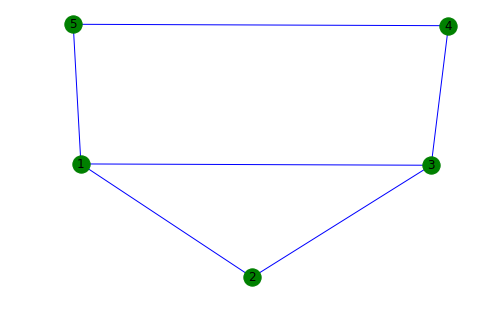

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
%matplotlib inline

myGraph = nx.Graph()

nodes = range(1, 5)
edges = [(1, 2), (2, 3), (3, 4), (4, 5), (1, 3), (1, 5)]

myGraph.add_nodes_from(nodes)
myGraph.add_edges_from(edges)

nx.draw(myGraph, with_labels=True, node_color="green", edge_color="blue")

## Measuring Graph Functionality

After you can visualize and understand a graph, you need to consider the question of which parts of the graph are important. Calculating *centrality*, the most important vertexes in a graph, can help you understand which parts of the graph require more attention. The following sections discuss the basic issues you must consider when measuring *graph functionality*, which is the capability of the graph to model a specific problem.

### Counting Edges and Vertexes

The number of edges and vertexes in a graph determines graph complexity. However, you use the combination of edges and vertexes to tell the full story. For example, you can have a node that isn't connected to the other nodes in any way - such a node represents a value that lacks connections to the others. 

The output of the code below shows that nodes 1 - 5 are connected and that node 6 lacks a connection.

The count of edges to a particular node is the *degree* of a given node. The higher the degree, the more complex the node becomes. By knowing the degree, you can develop an idea of which nodes are most important.

Connected Components:  [{1, 2, 3, 4, 5}, {6}]
Node Degrees (node, degree):  [(1, 3), (2, 2), (3, 3), (4, 2), (5, 2), (6, 0)]


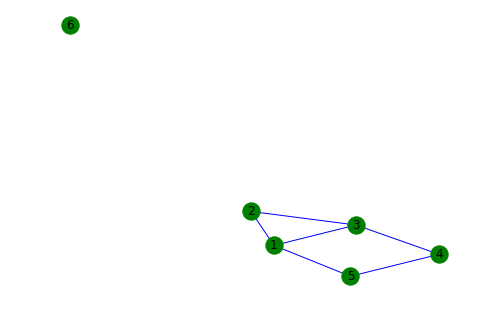

In [31]:
myGraph = nx.Graph()

nodes = range(1, 7)
edges = [(1, 2), (2, 3), (3, 4), (4, 5), (1, 3), (1, 5)]

myGraph.add_nodes_from(nodes)
myGraph.add_edges_from(edges)

print("Connected Components: ", sorted(nx.connected_components(myGraph)))

nx.draw(myGraph, with_labels=True, node_color="green", edge_color="blue")

print("Node Degrees (node, degree): ", myGraph.degree(nodes))

### Clustering

When modeling real-world data, such as the tweets about a particular topic, the nodes also tend to cluster. You might think of this tendency as a kind of trending - what people feel is important now. Measuring this tendency helps you understand which group of nodes is most important in a graph.

Clustering graphs helps aid your understanding of the data. The technique helps show that there are nodes in the graph that are better connected and nodes that risk isolation. When you understand how elements connect in a graph, you can determine how to strengthen its structure (or destroy it).

The output of the code below shows that the nodes are most likely to cluster around node 2 even though node 1 has a higher degree. That's because both nodes 1 and 3 have high degrees and node 2 is between them.

In [32]:
myGraph = nx.Graph()

nodes = range(1, 7)
edges = [(1, 2), (2, 3), (3, 4), (4, 5), (1, 3), (1, 5)]

myGraph.add_nodes_from(nodes)
myGraph.add_edges_from(edges)

nx.clustering(myGraph)

{1: 0.3333333333333333, 2: 1.0, 3: 0.3333333333333333, 4: 0, 5: 0, 6: 0}

### Computing Centrality

Centrality comes in a number of different forms because importance often depends on different factors. There are many ways of calculating centrality, and which one to use is dependent on the important characteristics of your graph. Fortunately, `NetworkX` provides you with a number of methods for calculating centrality. They include:
- **Degree Centrality: ** assigns an importance score based purely on the number of links held by each node; when working with directed graphs, you can calculate both in_degree_centrality and out_degree_centrality for a node
- **Closeness Centrality: ** the reciprocal of the sum of the length of the shortest paths between the node and all other nodes in the graph. Thus, the more central a node is, the closer it is to all other nodes.
- **Betweeness Centrality: ** is a measure of centrality in a graph based on shortest paths. For every pair of vertices in a connected graph, there exists at least one shortest path between the vertices such that either the number of edges that the path passes through (for unweighted graphs) or the sum of the weights of the edges (for weighted graphs) is minimized. The betweenness centrality for each vertex is the number of these shortest paths that pass through the vertex.

NetworkX provides a number of other centrality functions as well. The important consideration is determining how you want to calculate importance. Considering centrality in light of the kind of importance you want to attach to the vertexes and edges in a graph is essential.

Degree Centrality:
 {1: 0.8, 2: 0.4, 3: 0.6000000000000001, 4: 0.4, 5: 0.4, 6: 0.2}

Closeness Centrality:
 {1: 0.8333333333333334, 2: 0.625, 3: 0.7142857142857143, 4: 0.5555555555555556, 5: 0.625, 6: 0.5}

Betweenness Centrality:
 {1: 0.55, 2: 0.0, 3: 0.2, 4: 0.05, 5: 0.1, 6: 0.0}


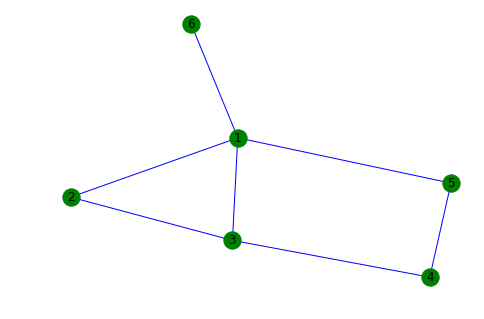

In [38]:
myGraph = nx.Graph()

nodes = range(1, 7)
edges = [(1, 2), (2, 3), (3, 4), (4, 5), (1, 3), (1, 5), (1, 6)]

myGraph.add_nodes_from(nodes)
myGraph.add_edges_from(edges)

print("Degree Centrality:\n", nx.degree_centrality(myGraph))
print("\nCloseness Centrality:\n", nx.closeness_centrality(myGraph))
print("\nBetweenness Centrality:\n", nx.betweenness_centrality(myGraph))

nx.draw(myGraph, with_labels=True, node_color="green", edge_color="blue")

## Putting a Graph in Numeric Format

Precision is an important part of using algorithms. Often, the more detail you can provide, the better the results you receive. To use certain algorithms, the data you provide must appear in certain forms or the result you receive won't make sense.

Fortunately, `NetworkX` provides a number of functions to convert your graph into forms that other packages and environments can use, including a `NumPy` matrix, a `SciPy` sparse representation and a Python Dictionary of lists.

### NumPy Matrix

You use `NumPy` to perform all sorts of data manipulation tasks. By analyzing the data in a graph, you might see patterns that wouldn't ordinarily be visible. The rows and columns in the matrix represent the nodes in the graph, and the value of 1 at a given cell represents a connection between those two nodes.

The size of the matrix is affected by the number of nodes, and the total number of cells is the square of the number of nodes.

In [39]:
myGraph = nx.Graph()

nodes = range(1, 7)
edges = [(1, 2), (2, 3), (3, 4), (4, 5), (1, 3), (1, 5), (1, 6)]

myGraph.add_nodes_from(nodes)
myGraph.add_edges_from(edges)

nx.to_numpy_matrix(myGraph)

matrix([[0., 1., 1., 0., 1., 1.],
        [1., 0., 1., 0., 0., 0.],
        [1., 1., 0., 1., 0., 0.],
        [0., 0., 1., 0., 1., 0.],
        [1., 0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0., 0.]])

### Sparse Representations

The `SciPy` package also performs various math, scientific and engineering tasks. When using this package, you can rely on a sparse matrix to hold the data. A sparse matrix is one in which only the action connections appear in the matrix; all other entries don't exist. The coordinates are indexed from zero, so (0, 1) actually refers to a connection between nodes 1 and 2.

In [41]:
myGraph = nx.Graph()

nodes = range(1, 7)
edges = [(1, 2), (2, 3), (3, 4), (4, 5), (1, 3), (1, 5), (1, 6)]

myGraph.add_nodes_from(nodes)
myGraph.add_edges_from(edges)

print(nx.to_scipy_sparse_matrix(myGraph))

  (0, 1)	1
  (0, 2)	1
  (0, 4)	1
  (0, 5)	1
  (1, 0)	1
  (1, 2)	1
  (2, 0)	1
  (2, 1)	1
  (2, 3)	1
  (3, 2)	1
  (3, 4)	1
  (4, 0)	1
  (4, 3)	1
  (5, 0)	1


### Python Dictionary of Lists

Depending on your needs, you might find that you also require the ability to create a dictionary of lists. Each node represents a dictionary entry, followed by a list of the nodes to which it connects.

In [42]:
myGraph = nx.Graph()

nodes = range(1, 7)
edges = [(1, 2), (2, 3), (3, 4), (4, 5), (1, 3), (1, 5), (1, 6)]

myGraph.add_nodes_from(nodes)
myGraph.add_edges_from(edges)

nx.to_dict_of_lists(myGraph)

{1: [2, 3, 5, 6], 2: [1, 3], 3: [2, 4, 1], 4: [3, 5], 5: [4, 1], 6: [1]}